# MLDI Project

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 

## Loading the Data set

In [2]:
movies= pd.read_csv('IMDB_Movies.csv')
movies.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
movies.shape

(5043, 28)

## Cheking for the Null Values

In [4]:
movies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [5]:
#Missing values in rows
movies.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4       13
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

## Percentage of missing values in columns

In [6]:
movies.isnull().sum(axis=0).sort_values(ascending=False)/len(movies)*100

gross                        17.529248
budget                        9.756098
aspect_ratio                  6.523895
content_rating                6.008328
plot_keywords                 3.033908
title_year                    2.141582
director_name                 2.062265
director_facebook_likes       2.062265
num_critic_for_reviews        0.991473
actor_3_name                  0.456078
actor_3_facebook_likes        0.456078
num_user_for_reviews          0.396589
color                         0.376760
duration                      0.297442
facenumber_in_poster          0.257783
actor_2_name                  0.257783
actor_2_facebook_likes        0.257783
language                      0.237954
actor_1_name                  0.138806
actor_1_facebook_likes        0.138806
country                       0.099147
cast_total_facebook_likes     0.000000
num_voted_users               0.000000
movie_title                   0.000000
movie_imdb_link               0.000000
genres                   

## Dropping unecessary columns 

In [7]:

movies = movies.drop([
    
    'color',
    'director_facebook_likes',
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'actor_2_name',
    'cast_total_facebook_likes',
    'actor_3_name',
    'duration',
    'facenumber_in_poster',
    'content_rating',
    'country',
    'movie_imdb_link',
    'aspect_ratio',
    'plot_keywords'],axis=1) 

In [8]:
movies = movies[movies['gross'].notnull()]
movies = movies[movies['budget'].notnull()]

In [9]:
#Rows having greater than 5 NaN values 
movies.isnull().sum(axis=1).sort_values(ascending =False)

4502    1
4720    1
4110    1
4837    1
4711    1
       ..
1375    0
1376    0
1377    0
1378    0
5042    0
Length: 3891, dtype: int64

In [10]:
round(movies.isnull().sum().sort_values(ascending=False)/len(movies)*100,2)

actor_1_name              0.08
language                  0.08
num_critic_for_reviews    0.03
director_name             0.00
gross                     0.00
genres                    0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

In [11]:
movies.groupby('language').language.count()

language
Aboriginal       2
Arabic           1
Aramaic          1
Bosnian          1
Cantonese        8
Czech            1
Danish           3
Dari             2
Dutch            3
Dzongkha         1
English       3707
Filipino         1
French          37
German          13
Hebrew           3
Hindi           10
Hungarian        1
Icelandic        1
Indonesian       2
Italian          7
Japanese        12
Kazakh           1
Korean           5
Mandarin        15
Maya             1
Mongolian        1
None             1
Norwegian        4
Persian          3
Portuguese       5
Romanian         1
Russian          1
Spanish         26
Swedish          1
Telugu           1
Thai             3
Vietnamese       1
Zulu             1
Name: language, dtype: int64

## Filling missing categorical value in Language column as English 

In [12]:
movies.language =movies.language.fillna('English')

## Converting Budget and Gross Income into Millions 

In [13]:
movies['budget']=movies['budget']/1000000
movies['gross']=movies['gross']/1000000

## Calculating Profit for movies

In [14]:

movies['profit']= movies['gross']-movies['budget']

In [15]:
movies.sort_values(by='profit',ascending=False)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.000000,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.000000,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.000000,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.000000,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.500000,1982.0,7.9,34000,424.449459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Katsuhiro Ôtomo,105.0,0.410388,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,79,Japanese,2127.519898,2004.0,6.9,973,-2127.109510
2323,Hayao Miyazaki,174.0,2.298191,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570,Japanese,2400.000000,1997.0,8.4,11000,-2397.701809
3005,Lajos Koltai,73.0,0.195888,Drama|Romance|War,Marcell Nagy,Fateless,5603,45,Hungarian,2500.000000,2005.0,7.1,607,-2499.804112
3859,Chan-wook Park,202.0,0.211667,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,131,Korean,4200.000000,2005.0,7.7,4000,-4199.788333


## Calculating Top 10 Movies 

In [16]:
top10=movies.sort_values(by='profit',ascending=False).head(10)

## Top Directors with Mean Gross Collection

In [17]:
director_gross = top10.groupby('director_name').gross.mean().sort_values(ascending=False)
type(director_gross)
director_gross=director_gross.to_frame()
director_gross=director_gross.reset_index()
director_gross

,director_name,gross
0,James Cameron,709.589074
1,Colin Trevorrow,652.177271
2,Joss Whedon,623.279547
3,Christopher Nolan,533.316061
4,George Lucas,467.740171
5,Steven Spielberg,434.949459
6,Roger Allers,422.783777


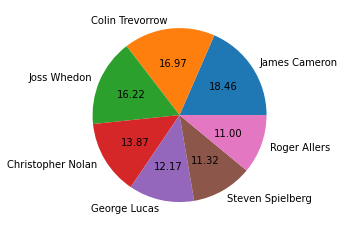

In [18]:
import matplotlib.pyplot as plt
plt.pie(director_gross['gross'],labels=director_gross['director_name'],autopct='%1.2f')
plt.show()

In [19]:
top5=movies.sort_values(by='profit',ascending=False).head(5)

In [20]:
top5

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.449459


No handles with labels found to put in legend.


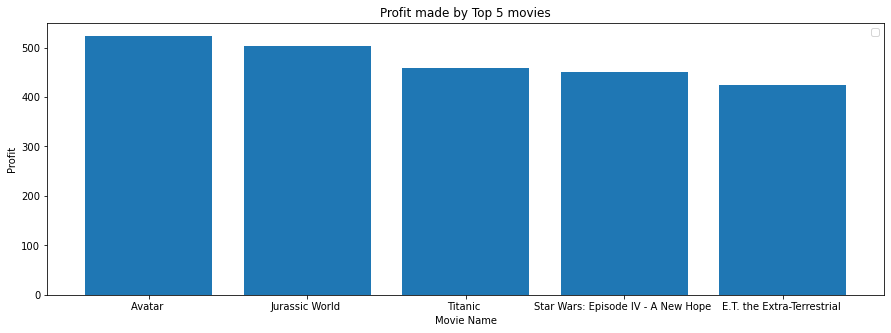

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.bar(top5['movie_title'],top5['profit'])


plt.legend()
plt.xlabel('Movie Name')
plt.ylabel('Profit')
plt.title('Profit made by Top 5 movies')
plt.show()

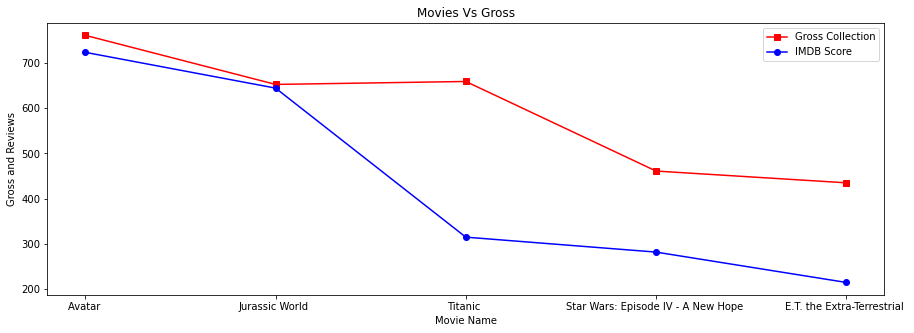

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(top5['movie_title'],top5['gross'],label='Gross Collection',color='red',marker='s')
plt.plot(top5['movie_title'],top5['num_critic_for_reviews'],label='IMDB Score',color='blue',marker='o')

plt.legend()

plt.xlabel('Movie Name')
plt.ylabel('Gross and Reviews')
plt.title('Movies Vs Gross')
plt.show()



No handles with labels found to put in legend.


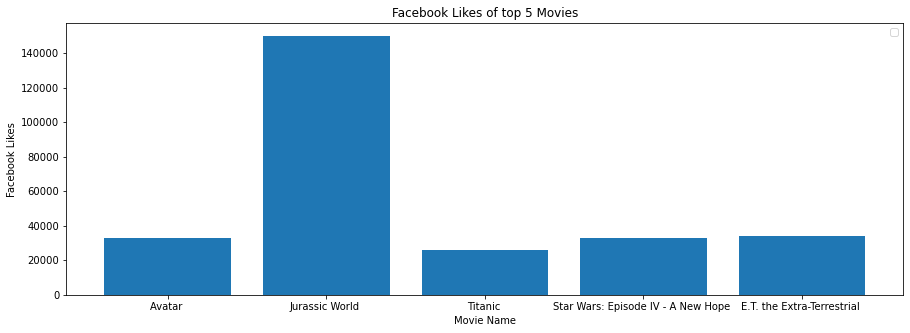

In [23]:
plt.figure(figsize=(15,5))
plt.bar(top5['movie_title'],top5['movie_facebook_likes'])


plt.legend()
plt.xlabel('Movie Name')
plt.ylabel('Facebook Likes')
plt.title('Facebook Likes of top 5 Movies')
plt.show()

In [24]:
movies.drop_duplicates(keep='first',inplace=True)

## IMDB Top 250 based on IMDB Rating

In [25]:
#IMDB top 250
IMDB_top_250=movies[movies['num_voted_users']>25000].sort_values(by='imdb_score',ascending=False).head(250)

In [26]:
IMDB_top_250.head(5)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
1937,Frank Darabont,199.0,28.341469,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144,English,25.0,1994.0,9.3,108000,3.341469
3466,Francis Ford Coppola,208.0,134.821952,Crime|Drama,Al Pacino,The Godfather,1155770,2238,English,6.0,1972.0,9.2,43000,128.821952
2837,Francis Ford Coppola,149.0,57.300000,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650,English,13.0,1974.0,9.0,14000,44.300000
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.316061
4498,Sergio Leone,181.0,6.100000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780,Italian,1.2,1966.0,8.9,20000,4.900000


In [27]:
IMDB_top_250['Rank']=IMDB_top_250['imdb_score'].rank(method='first',ascending=False)

In [28]:
IMDB_top_250.head(5)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,Rank
1937,Frank Darabont,199.0,28.341469,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144,English,25.0,1994.0,9.3,108000,3.341469,1.0
3466,Francis Ford Coppola,208.0,134.821952,Crime|Drama,Al Pacino,The Godfather,1155770,2238,English,6.0,1972.0,9.2,43000,128.821952,2.0
2837,Francis Ford Coppola,149.0,57.300000,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650,English,13.0,1974.0,9.0,14000,44.300000,3.0
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.316061,4.0
4498,Sergio Leone,181.0,6.100000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780,Italian,1.2,1966.0,8.9,20000,4.900000,5.0


## Top Foreign Movies 

In [29]:
IMDB_top_250[IMDB_top_250['language']!='English']

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,Rank
4498,Sergio Leone,181.0,6.100000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780,Italian,1.200000,1966.0,8.9,20000,4.900000,5.0
4747,Akira Kurosawa,153.0,0.269061,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,596,Japanese,2.000000,1954.0,8.7,11000,-1.730939,17.0
4029,Fernando Meirelles,214.0,7.563397,Crime|Drama,Alice Braga,City of God,533200,749,Portuguese,3.300000,2002.0,8.7,28000,4.263397,20.0
2373,Hayao Miyazaki,246.0,10.049886,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,902,Japanese,19.000000,2001.0,8.6,28000,-8.950114,23.0
4259,Florian Henckel von Donnersmarck,215.0,11.284657,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,407,German,2.000000,2006.0,8.5,39000,9.284657,35.0
4921,Majid Majidi,46.0,0.925402,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,130,Persian,0.180000,1997.0,8.5,0,0.745402,39.0
2323,Hayao Miyazaki,174.0,2.298191,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570,Japanese,2400.000000,1997.0,8.4,11000,-2397.701809,47.0
2970,Wolfgang Petersen,96.0,11.433134,Adventure|Drama|Thriller|War,Jürgen Prochnow,Das Boot,168203,426,German,14.000000,1981.0,8.4,11000,-2.566866,49.0
4105,Chan-wook Park,305.0,2.181290,Drama|Mystery|Thriller,Min-sik Choi,Oldboy,356181,809,Korean,3.000000,2003.0,8.4,43000,-0.818710,57.0
4659,Asghar Farhadi,354.0,7.098492,Drama|Mystery,Shahab Hosseini,A Separation,151812,264,Persian,0.500000,2011.0,8.4,48000,6.598492,58.0


## Top Directors according to IMDB Score 

In [30]:
top10director = movies.groupby('director_name').imdb_score.mean().sort_values(ascending=False).head(10)
top10director=top10director.to_frame()
top10director=top10director.reset_index()

No handles with labels found to put in legend.


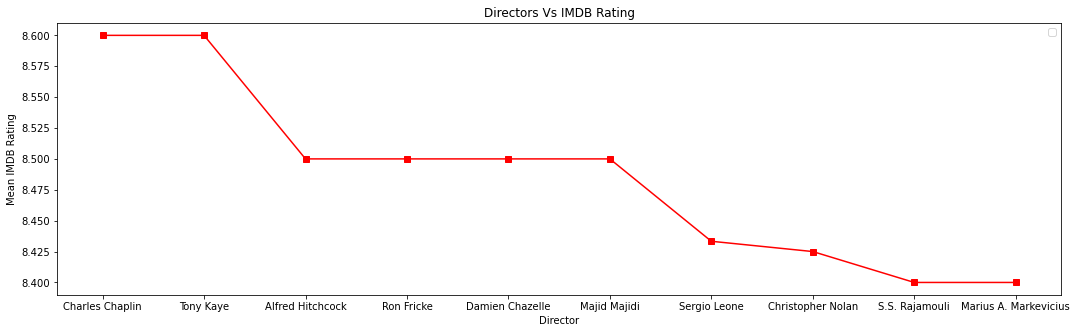

In [31]:
plt.figure(figsize=(18,5))
plt.plot(top10director['director_name'],top10director['imdb_score'],color='red',marker='s')
plt.legend()

plt.xlabel('Director')
plt.ylabel('Mean IMDB Rating')
plt.title('Directors Vs IMDB Rating')
plt.show()



## Splitting the Genre Category and making two different category 

In [32]:
TempGenre = movies.genres.str.split('|',expand=True).iloc[:,0:2]
TempGenre.columns=['genre_1','genre_2']
TempGenre.genre_2.fillna(TempGenre.genre_1,inplace=True)
TempGenre

,genre_1,genre_2
0,Action,Adventure
1,Action,Adventure
2,Action,Adventure
3,Action,Thriller
5,Action,Adventure
...,...,...
5033,Drama,Sci-Fi
5034,Thriller,Thriller
5035,Action,Crime
5037,Comedy,Drama


In [33]:
movies = pd.concat([movies,TempGenre],axis=1)
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0000,2009.0,7.9,33000,523.505847,Action,Adventure
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300.0000,2007.0,7.1,0,9.404152,Action,Adventure
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245.0000,2015.0,6.8,85000,-44.925825,Action,Adventure
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250.0000,2012.0,8.5,164000,198.130642,Action,Thriller
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263.7000,2012.0,6.6,24000,-190.641321,Action,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.424760,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371,English,0.0070,2004.0,7.0,19000,0.417760,Drama,Sci-Fi
5034,Neill Dela Llana,35.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35,English,0.0070,2005.0,6.3,74,0.063071,Thriller,Thriller
5035,Robert Rodriguez,56.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130,Spanish,0.0070,1992.0,6.9,0,2.033920,Action,Crime
5037,Edward Burns,14.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14,English,0.0090,2011.0,6.4,413,-0.004416,Comedy,Drama


## Top grossing movies accorging to Genres

In [34]:
m=movies.groupby(['genre_1','genre_2']).gross.mean().sort_values(ascending=False).head(5)
m=m.to_frame()
m=m.reset_index()
m['genre']= m['genre_1']+ "- " +m['genre_2']
m

,genre_1,genre_2,gross,genre
0,Family,Sci-Fi,434.949459,Family- Sci-Fi
1,Adventure,Sci-Fi,228.627758,Adventure- Sci-Fi
2,Adventure,Family,118.919540,Adventure- Family
3,Adventure,Animation,116.998550,Adventure- Animation
4,Action,Adventure,109.595465,Action- Adventure


No handles with labels found to put in legend.


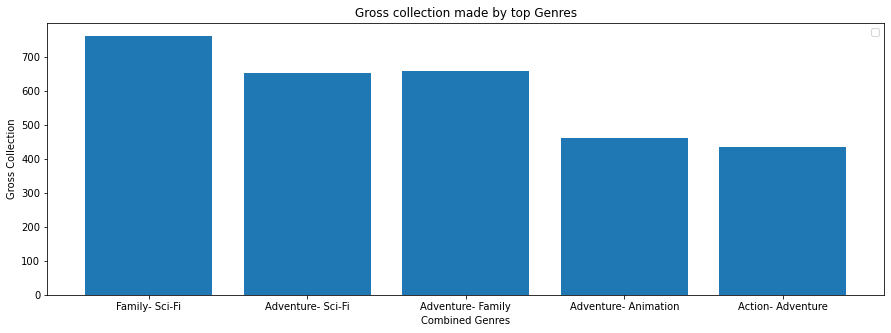

In [35]:
plt.figure(figsize=(15,5))
plt.bar(m['genre'],top5['gross'])


plt.legend()
plt.xlabel('Combined Genres')
plt.ylabel('Gross Collection')
plt.title('Gross collection made by top Genres')
plt.show()

In [36]:
movies.head(5)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.505847,Action,Adventure
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300.0,2007.0,7.1,0,9.404152,Action,Adventure
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245.0,2015.0,6.8,85000,-44.925825,Action,Adventure
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250.0,2012.0,8.5,164000,198.130642,Action,Thriller
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263.7,2012.0,6.6,24000,-190.641321,Action,Adventure


In [37]:
movies = movies.drop(['genres'],axis=1) 

In [38]:
movies.head(1)

,director_name,num_critic_for_reviews,gross,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
0,James Cameron,723.0,760.505847,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.505847,Action,Adventure


## Rearranging the columns in the data frame 

In [39]:
movies.columns

Index(['director_name', 'num_critic_for_reviews', 'gross', 'actor_1_name',
       'movie_title', 'num_voted_users', 'num_user_for_reviews', 'language',
       'budget', 'title_year', 'imdb_score', 'movie_facebook_likes', 'profit',
       'genre_1', 'genre_2'],
      dtype='object')

In [40]:
col=['director_name','actor_1_name','movie_title','language', 'genre_1', 'genre_2','num_critic_for_reviews', 
        'num_voted_users', 'num_user_for_reviews', 
       'budget', 'title_year', 'imdb_score', 'movie_facebook_likes', 'profit',
       'gross']

In [41]:
movies=movies.reindex(columns=col)

In [42]:
movies = movies.drop(['title_year'],axis=1) 

In [43]:
movies.head(5)

,director_name,actor_1_name,movie_title,language,genre_1,genre_2,num_critic_for_reviews,num_voted_users,num_user_for_reviews,budget,imdb_score,movie_facebook_likes,profit,gross
0,James Cameron,CCH Pounder,Avatar,English,Action,Adventure,723.0,886204,3054,237.0,7.9,33000,523.505847,760.505847
1,Gore Verbinski,Johnny Depp,Pirates of the Caribbean: At World's End,English,Action,Adventure,302.0,471220,1238,300.0,7.1,0,9.404152,309.404152
2,Sam Mendes,Christoph Waltz,Spectre,English,Action,Adventure,602.0,275868,994,245.0,6.8,85000,-44.925825,200.074175
3,Christopher Nolan,Tom Hardy,The Dark Knight Rises,English,Action,Thriller,813.0,1144337,2701,250.0,8.5,164000,198.130642,448.130642
5,Andrew Stanton,Daryl Sabara,John Carter,English,Action,Adventure,462.0,212204,738,263.7,6.6,24000,-190.641321,73.058679


## Extracting Top Actors by Crtic's Review and user Review 

In [44]:
Meryl_Streep = movies[movies['actor_1_name']=='Meryl Streep']
Leo_Caprio = movies[movies['actor_1_name']=='Leonardo DiCaprio']
Brad_Pitt = movies[movies['actor_1_name']=='Brad Pitt']

In [45]:
Combined = Meryl_Streep.append([Leo_Caprio,Brad_Pitt])
Combined

,director_name,actor_1_name,movie_title,language,genre_1,genre_2,num_critic_for_reviews,num_voted_users,num_user_for_reviews,budget,imdb_score,movie_facebook_likes,profit,gross
410,Nancy Meyers,Meryl Streep,It's Complicated,English,Comedy,Drama,187.0,69860,214,85.0,6.6,0,27.703470,112.703470
1106,Curtis Hanson,Meryl Streep,The River Wild,English,Action,Adventure,42.0,32544,69,45.0,6.3,0,1.815748,46.815748
1204,Nora Ephron,Meryl Streep,Julie & Julia,English,Biography,Drama,252.0,79264,277,40.0,7.0,13000,54.125426,94.125426
1408,David Frankel,Meryl Streep,The Devil Wears Prada,English,Comedy,Drama,208.0,286178,631,35.0,6.8,0,89.732962,124.732962
1483,Robert Redford,Meryl Streep,Lions for Lambs,English,Drama,Thriller,227.0,41170,298,35.0,6.2,0,-20.001930,14.998070
1575,Sydney Pollack,Meryl Streep,Out of Africa,English,Biography,Drama,66.0,52339,200,31.0,7.2,0,56.100000,87.100000
1618,David Frankel,Meryl Streep,Hope Springs,English,Comedy,Drama,234.0,34258,178,30.0,6.3,0,33.536011,63.536011
1674,Carl Franklin,Meryl Streep,One True Thing,English,Drama,Drama,64.0,9283,112,30.0,7.0,592,-6.790560,23.209440
1925,Stephen Daldry,Meryl Streep,The Hours,English,Drama,Romance,174.0,102123,660,25.0,7.6,0,16.597830,41.597830
2781,Phyllida Lloyd,Meryl Streep,The Iron Lady,English,Biography,Drama,331.0,82327,350,13.0,6.4,18000,16.959436,29.959436


## Data Visualization

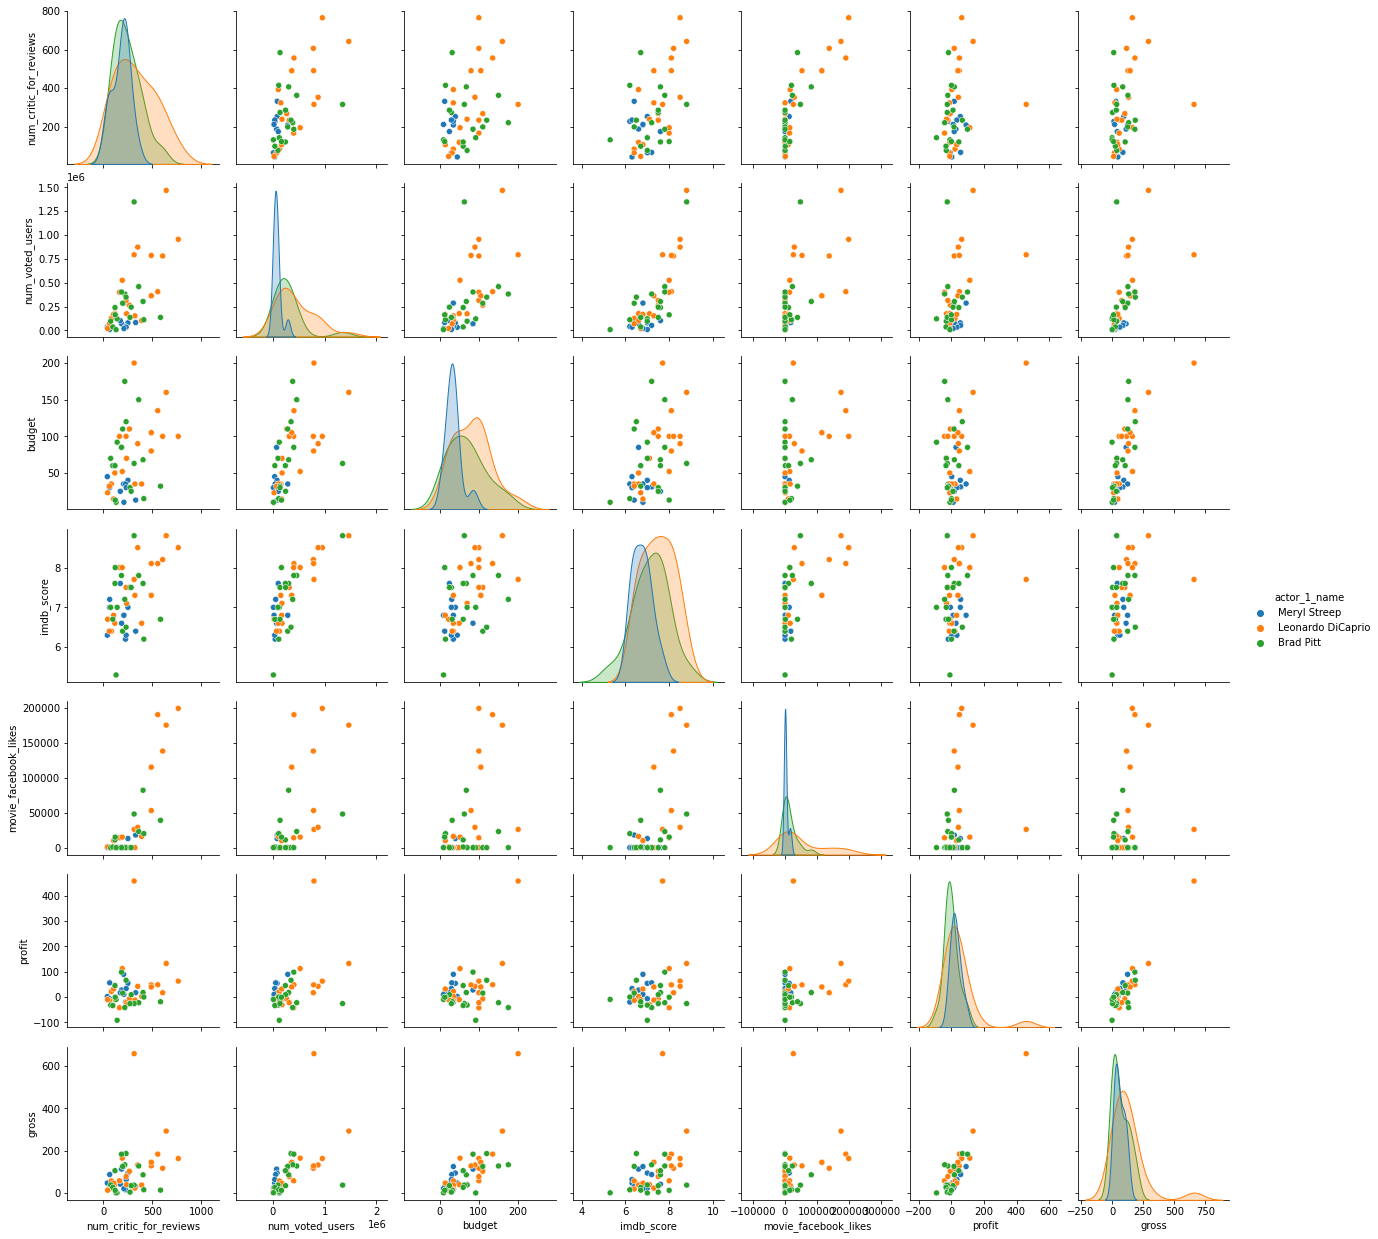

In [46]:
import seaborn as sns
sns.pairplot(Combined,hue='actor_1_name')

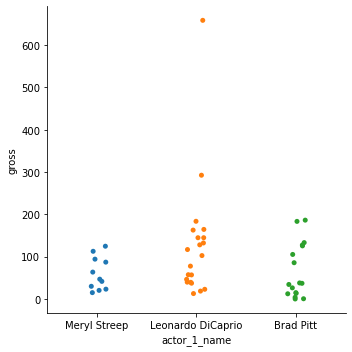

In [47]:
sns.catplot(x='actor_1_name',y='gross',data=Combined)

In [48]:
Combined.groupby('actor_1_name').num_critic_for_reviews.mean()

actor_1_name
Brad Pitt            245.000000
Leonardo DiCaprio    330.190476
Meryl Streep         181.454545
Name: num_critic_for_reviews, dtype: float64

In [49]:
Combined.num_user_for_reviews = Combined.num_user_for_reviews.astype('int')

In [50]:
Combined.groupby('actor_1_name').num_user_for_reviews.mean()

actor_1_name
Brad Pitt            742.352941
Leonardo DiCaprio    914.476190
Meryl Streep         297.181818
Name: num_user_for_reviews, dtype: float64

In [51]:
comb=Combined.groupby('actor_1_name')[['num_critic_for_reviews','num_user_for_reviews']].mean()
comb=comb.reset_index()
comb


,actor_1_name,num_critic_for_reviews,num_user_for_reviews
0,Brad Pitt,245.000000,742.352941
1,Leonardo DiCaprio,330.190476,914.476190
2,Meryl Streep,181.454545,297.181818


No handles with labels found to put in legend.


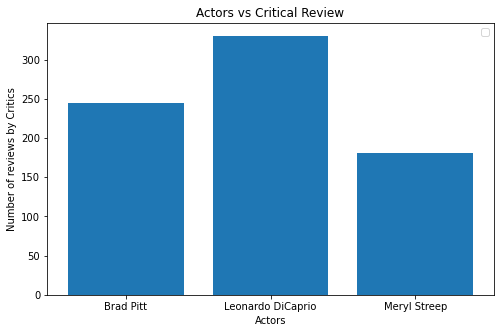

In [52]:
plt.figure(figsize=(8,5))
plt.bar(comb['actor_1_name'],comb['num_critic_for_reviews'])



plt.legend()
plt.xlabel('Actors')
plt.ylabel('Number of reviews by Critics')
plt.title('Actors vs Critical Review')
plt.show()

No handles with labels found to put in legend.


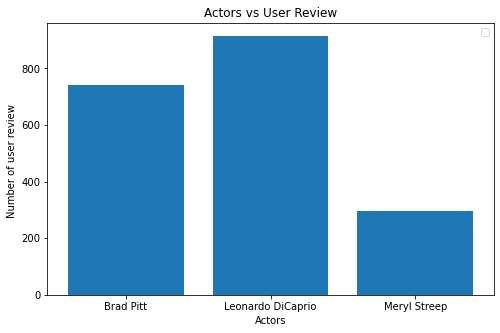

In [53]:
plt.figure(figsize=(8,5))
plt.bar(comb['actor_1_name'],comb['num_user_for_reviews'])
plt.legend()
plt.xlabel('Actors')
plt.ylabel('Number of user review ')
plt.title('Actors vs User Review')
plt.show()

## Data Visualization for orignal Movies Database

<AxesSubplot:xlabel='num_critic_for_reviews', ylabel='imdb_score'>

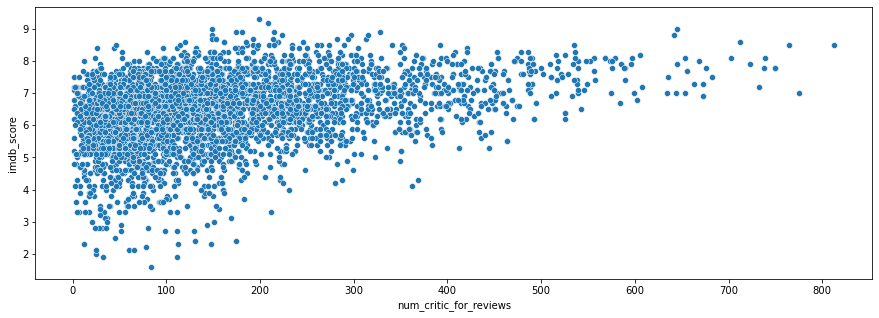

In [54]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.scatterplot(x='num_critic_for_reviews',y='imdb_score',data=movies)

<AxesSubplot:xlabel='movie_facebook_likes', ylabel='gross'>

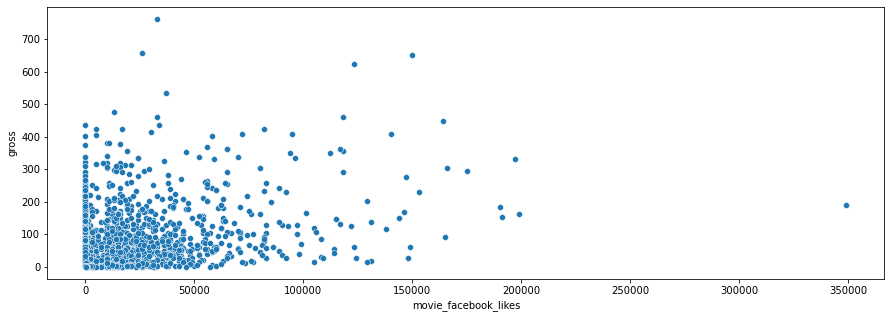

In [55]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='movie_facebook_likes',y='gross',data=movies)

<AxesSubplot:xlabel='genre_1', ylabel='gross'>

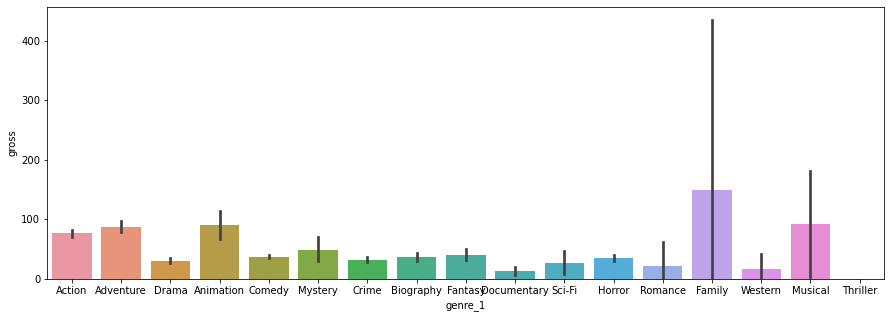

In [56]:
plt.figure(figsize=(15,5))
sns.barplot(x='genre_1',y='gross',data=movies)

<AxesSubplot:xlabel='genre_1', ylabel='count'>

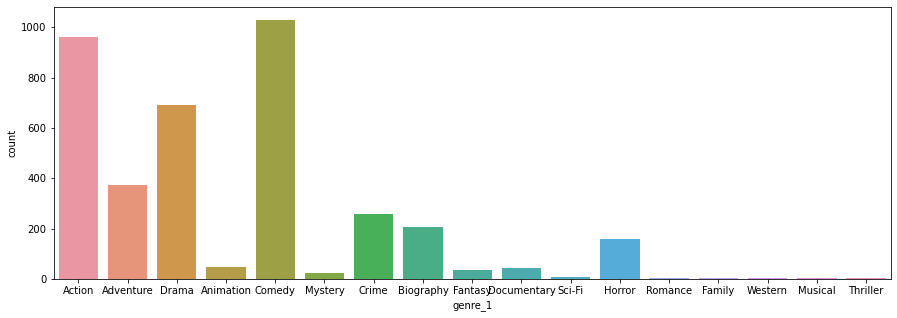

In [57]:
plt.figure(figsize=(15,5))
sns.countplot(x='genre_1',data=movies)

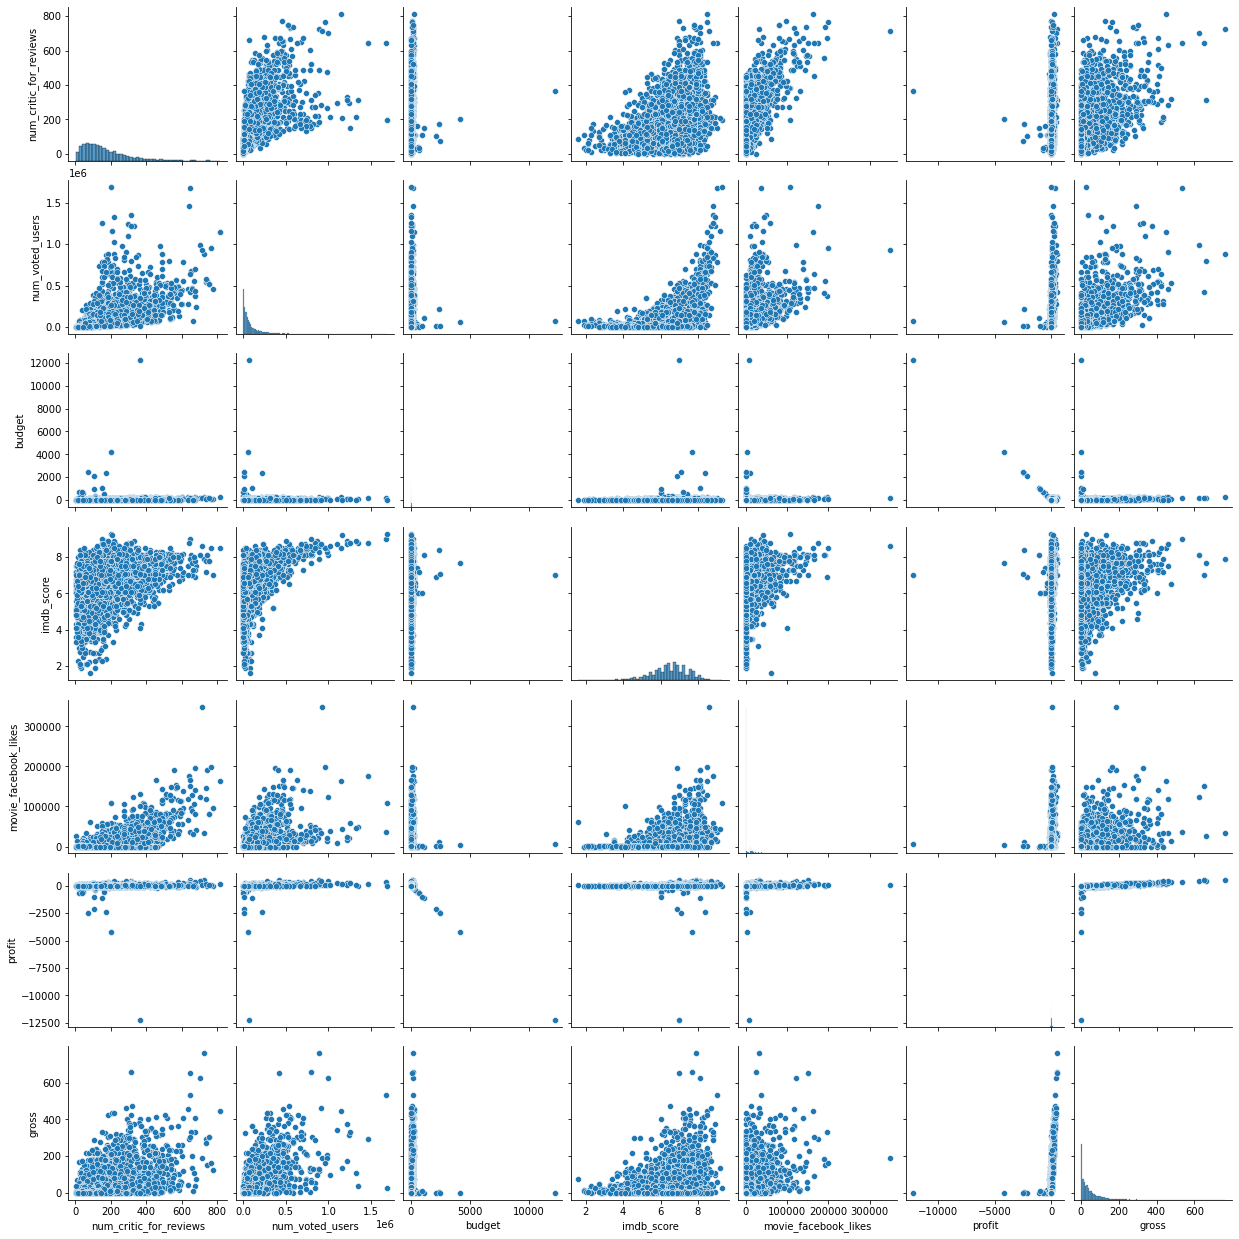

In [58]:
sns.pairplot(movies)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gross', ylabel='Density'>

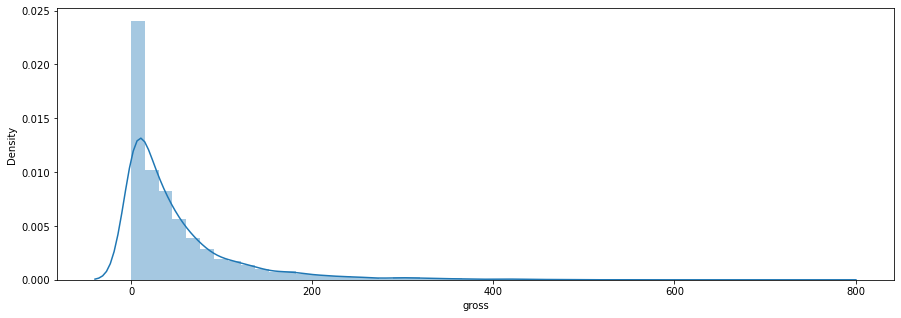

In [59]:
plt.figure(figsize=(15,5))
sns.distplot(movies['gross'])

<AxesSubplot:xlabel='genre_1', ylabel='gross'>

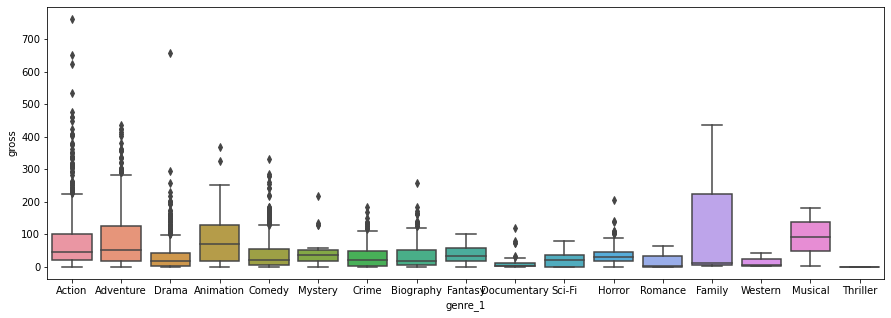

In [60]:
plt.figure(figsize=(15,5))
sns.boxplot(x='genre_1',y='gross',data=movies)

<AxesSubplot:xlabel='genre_1', ylabel='imdb_score'>

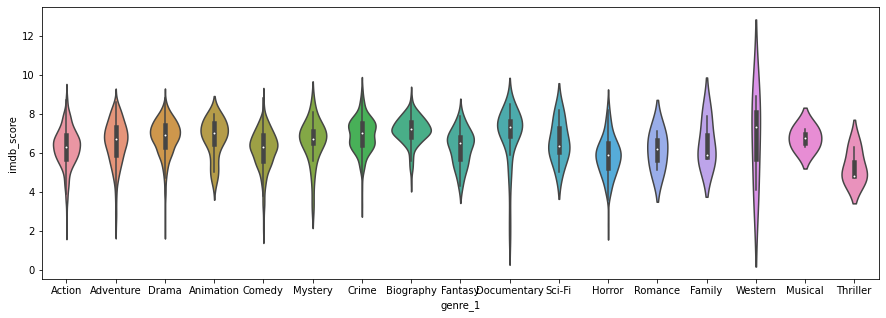

In [61]:
plt.figure(figsize=(15,5))
sns.violinplot(x='genre_1',y='imdb_score',data=movies)

## Extracting Independent and Dependent Variable

In [146]:
import numpy as np
X=movies.iloc[:,0:13]
Y=movies.iloc[:,13:14]


In [147]:
movies.head(3)

,director_name,actor_1_name,movie_title,language,genre_1,genre_2,num_critic_for_reviews,num_voted_users,num_user_for_reviews,budget,imdb_score,movie_facebook_likes,profit,gross,Hit/Flop
0,James Cameron,CCH Pounder,Avatar,English,Action,Adventure,723.0,886204,3054,237.0,7.9,33000,523.505847,760.505847,1
1,Gore Verbinski,Johnny Depp,Pirates of the Caribbean: At World's End,English,Action,Adventure,302.0,471220,1238,300.0,7.1,0,9.404152,309.404152,1
2,Sam Mendes,Christoph Waltz,Spectre,English,Action,Adventure,602.0,275868,994,245.0,6.8,85000,-44.925825,200.074175,1


## One Hot Encoding for Categorical variable 

In [148]:
X=pd.get_dummies(X)
np.isnan(X)
np.where(np.isnan(X))
X=np.nan_to_num(X)
# X.head()
np.isnan(Y)
np.where(np.isnan(Y))
Y=np.nan_to_num(Y)


## Splitting the Data set into test and train Data Set

In [149]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=0)

## Normalization of Data Set

In [150]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [151]:
from sklearn.linear_model import LinearRegression 
MLR=LinearRegression()
MLR.fit(X_train,Y_train)

LinearRegression()

In [152]:
MLR.coef_

array([[6.52072938e+00, 3.34405337e-10, 2.54759160e+00, ...,
        7.03672406e-01, 0.00000000e+00, 2.46207735e-02]])

In [153]:
MLR.intercept_

array([50.43049219])

In [154]:
Y_pred=MLR.predict(X_test)


In [155]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)*100

37.48619813358312

In [156]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,Y_pred)


36.15981002343221

In [157]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
print('R2_Score---->', r2_score(Y_test, Y_pred)*100)
print('MSE is--->',mean_squared_error(Y_test, Y_pred))
print('MAE is--->',mean_absolute_error(Y_test, Y_pred))
print('RMSE is--->',math.sqrt(mean_squared_error(Y_test, Y_pred)))

R2_Score----> 37.48619813358312
MSE is---> 3079.512564874921
MAE is---> 36.15981002343221
RMSE is---> 55.4933560426374


## Regression using feature selection 

In [98]:
feature_df=movies.drop(['director_name','actor_1_name','movie_title','language','genre_1','genre_2','profit'],axis=1)
feature_df.head(3)

,num_critic_for_reviews,num_voted_users,num_user_for_reviews,budget,imdb_score,movie_facebook_likes,gross,Hit/Flop
0,723.0,886204,3054,237.0,7.9,33000,760.505847,1
1,302.0,471220,1238,300.0,7.1,0,309.404152,1
2,602.0,275868,994,245.0,6.8,85000,200.074175,1


In [75]:
x=feature_df.iloc[:,0:6]
y=feature_df.iloc[:,6:7]


In [76]:
x['num_critic_for_reviews'].fillna(int(x['num_critic_for_reviews'].mean()), inplace=True)
x.isnull().sum()

num_critic_for_reviews    0
num_voted_users           0
num_user_for_reviews      0
budget                    0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [78]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(x_train,y_train)
mutual_info

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0.14618314, 0.38618526, 0.27746896, 0.31142687, 0.08247508,
       0.15670094])

In [80]:
mutual_info=pd.Series(mutual_info)
# mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

1    0.386185
3    0.311427
2    0.277469
5    0.156701
0    0.146183
4    0.082475
dtype: float64

<AxesSubplot:>

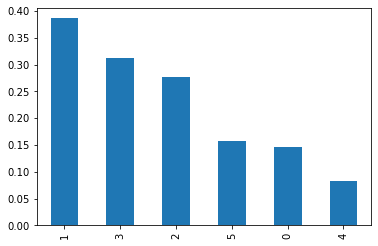

In [81]:
mutual_info.sort_values(ascending=False).plot.bar()

In [82]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [83]:
from sklearn.linear_model import LinearRegression 
MLR=LinearRegression()
MLR.fit(x_train,y_train)

LinearRegression()

In [84]:
y_pred=MLR.predict(x_test)

In [85]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

47.8800930213826

In [99]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
print('R2_Score---->', r2_score(y_test, y_pred)*100)
print('MSE is--->',mean_squared_error(y_test, y_pred))
print('MAE is--->',mean_absolute_error(y_test, y_pred))
print('RMSE is--->',math.sqrt(mean_squared_error(y_test, y_pred)))

R2_Score----> 47.8800930213826
MSE is---> 2567.4955550414043
MAE is---> 33.48178376730355
RMSE is---> 50.6704603792131


## Classifying a movie as Hit or Flop

In [86]:
movies['Hit/Flop']= movies['gross'].apply(lambda x : 0 if x<movies['gross'].mean() else 1)

In [87]:
movies.head(3)

,director_name,actor_1_name,movie_title,language,genre_1,genre_2,num_critic_for_reviews,num_voted_users,num_user_for_reviews,budget,imdb_score,movie_facebook_likes,profit,gross,Hit/Flop
0,James Cameron,CCH Pounder,Avatar,English,Action,Adventure,723.0,886204,3054,237.0,7.9,33000,523.505847,760.505847,1
1,Gore Verbinski,Johnny Depp,Pirates of the Caribbean: At World's End,English,Action,Adventure,302.0,471220,1238,300.0,7.1,0,9.404152,309.404152,1
2,Sam Mendes,Christoph Waltz,Spectre,English,Action,Adventure,602.0,275868,994,245.0,6.8,85000,-44.925825,200.074175,1


In [88]:
X1=movies.iloc[:,0:14]
Y1=movies.iloc[:,14:15]

In [89]:
X1=pd.get_dummies(X1)
np.isnan(X1)
np.where(np.isnan(X1))
X1=np.nan_to_num(X1)
# X.head()
np.isnan(Y1)
np.where(np.isnan(Y1))
Y1=np.nan_to_num(Y1)


In [90]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2, random_state=0)

In [91]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X1_train=sc.fit_transform(X1_train)
X1_test=sc.transform(X1_test)

In [92]:
from sklearn.linear_model import LogisticRegression
LRC=LogisticRegression()
LRC.fit(X1_train,Y1_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [93]:
Y1_pred=LRC.predict(X1_test)

In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y1_test,Y1_pred)

array([[484,  30],
       [118, 140]], dtype=int64)

In [120]:
cm=confusion_matrix(Y1_test,Y1_pred)

<AxesSubplot:>

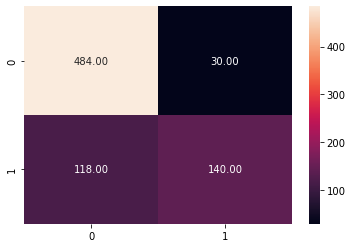

In [96]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='.2f')


In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(Y1_test,Y1_pred)*100

80.82901554404145

In [109]:
feature_df.head(3)

,num_critic_for_reviews,num_voted_users,num_user_for_reviews,budget,imdb_score,movie_facebook_likes,gross,Hit/Flop
0,723.0,886204,3054,237.0,7.9,33000,760.505847,1
1,302.0,471220,1238,300.0,7.1,0,309.404152,1
2,602.0,275868,994,245.0,6.8,85000,200.074175,1


In [125]:
x1=feature_df.iloc[:,0:6]
y1=feature_df.iloc[:,7:8]


In [112]:
x1['num_critic_for_reviews'].fillna(int(x1['num_critic_for_reviews'].mean()), inplace=True)
x1.isnull().sum()

num_critic_for_reviews    0
num_voted_users           0
num_user_for_reviews      0
budget                    0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [113]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2, random_state=0)

In [114]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1_train=sc.fit_transform(x1_train)
x1_test=sc.transform(x1_test)

In [115]:
from sklearn.linear_model import LogisticRegression
LRC=LogisticRegression()
LRC.fit(x1_train,y1_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [117]:
y1_pred=LRC.predict(x1_test)

In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test,y1_pred)

array([[490,  24],
       [144, 114]], dtype=int64)

In [124]:
cm1=confusion_matrix(y1_test,y1_pred)

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_test,y1_pred)*100

78.23834196891191

<AxesSubplot:>

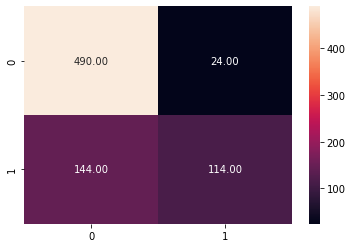

In [126]:
import seaborn as sns
sns.heatmap(cm1,annot=True,fmt='.2f')